Backbone networks, often referred to simply as "backbones," are a crucial component of many computer vision systems, particularly in tasks like object detection, image classification, and semantic segmentation. The term "backbone" typically refers to the convolutional neural network (CNN) architecture used to extract feature maps from input images.

In [1]:
import torch
import torchvision.models as models
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import transforms,ToPILImage
import urllib.request


# AlexNet

An interesting Article on History of AlexNet unfolding that took the world by shock and steer a new direction in Deep Learning and Computer Vision<br>
https://www.pinecone.io/learn/series/image-search/imagenet/

The Paper on the Model is as follows<br>
https://papers.nips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

In [2]:
modelAlexNet = models.alexnet(pretrained=True) # pretrained is a must otherwise learning weights will not be downloaded

C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Lenovo/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
99.3%

In [6]:
print(modelAlexNet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

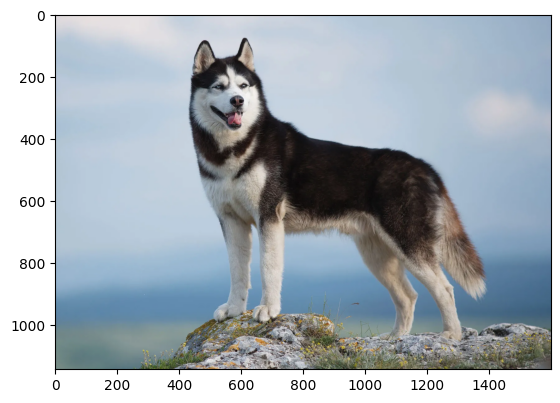

In [2]:
image = Image.open("./husky.webp")  # Download and Load your image here
plt.imshow(image)

### Test The Image on AlextNet Trained Network

#### PreProcess the Image according to AlexNet needs

In [3]:
transformsImages = transforms.Compose([
    transforms.Resize(256), #Convert image to 256*256 to ensure aspect ratio is maintained before centreCrop
    transforms.CenterCrop(224), #Now Centrecrop the image so it size is now 224*224 as needed by AlexNet
    transforms.ToTensor() , #Convert the image to Tensore as Normalize needs it this way 
    #Mean and Std are of each respective channel of RGB image and these values are commonly used in Computer Vision tasks, still not generic and vary from dataset to dataset
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
    
]) #Composes several transforms together

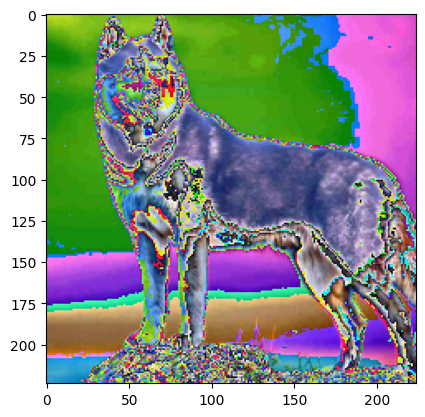

In [4]:
transformed_image = transformsImages(image)
to_pil = ToPILImage()
pil_image = to_pil(transformed_image)

plt.imshow(pil_image)

In [8]:
#Add BatchSize to Fit the Model Need
print(transformed_image.shape)
transformed_image = transformed_image.reshape(1,3,224,224)
print(transformed_image.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


#### Test The Model on this Pre-Processed Image

In [30]:
# Set the model to evaluation mode
modelAlexNet.eval()
with torch.no_grad():
    output = modelAlexNet(transformed_image)

In [43]:
predictedClass = output.argmax()
print(" This is Predicted Class label:",predictedClass.item())

 This is Predicted Class label: 248


In [42]:
#To Make it Human Readable lets download Human ImageNet Class Labels on which model was trained as match Out classlabel with it.
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
urllib.request.urlretrieve(url, "imagenet_classes.txt")

# Get the ImageNet labels
with open("imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

# Get the predicted label
predicted_label = labels[predictedClass]

print("Predicted class label:", predicted_label)

Predicted class label: Eskimo dog


# VGG-Net

The paper on Model can be found here <br>
https://arxiv.org/abs/1409.1556

VGG network architecture has several variations, with the most common ones being VGG11, VGG13, VGG16, and VGG19. The numbers in the model names correspond to the number of convolutional layers in the network. For example, VGG16 has 16 convolutional layers, while VGG19 has 19 convolutional layers.<br>

When choosing a VGG variation for a particular task, you'll need to consider the trade-offs between model complexity, computational resources, and task requirements.

In [52]:
'''The main difference between them lies in the presence of batch normalization layers.VGG19_bn includes 
batch normalization layers, which can improve training stability, convergence speed, and generalization 
performance compared to the original VGG19 '''

modelVGG19 = models.vgg19(pretrained=True)
modelVGG19BN = models.vgg19_bn(pretrained=True)

#I will be moving forward with vgg19_bn


C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\Lenovo/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
100.0%
C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be

In [53]:
print(modelVGG19BN)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

#### Test The Model on this Pre-Processed Image

<b>It takes the same input as AlexNet so we dont need to perform Transformations and Preprocessing<b>

In [54]:
# Set the model to evaluation mode
modelVGG19BN.eval()
with torch.no_grad():
    output = modelVGG19BN(transformed_image)

In [55]:
predictedClass = output.argmax()
print(" This is Predicted Class label:",predictedClass.item())

 This is Predicted Class label: 248


In [56]:
# Get the predicted label
predicted_label = labels[predictedClass]

print("Predicted class label:", predicted_label)

Predicted class label: Eskimo dog


# ResNet

ResNet Paper was introduced to work on Vanishing / Exploding Gradient of really Deep Neural Networks :- <br>
https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf

A good article giving overall view of how Residual Network works.<br>
https://medium.com/@ibtedaazeem/understanding-resnet-architecture-a-deep-dive-into-residual-neural-network-2c792e6537a9 <br>

In easier/layman terms after some covolutional layers (usually 2), connections allow the network to add the original input of a convolutional layer to its output. This helps in preventing loss of information or gradients as the data passes through the network. It's like saying, "Here's what we started with, let's not forget about it as we make changes."

In [5]:
modelResNet = models.resnet50(weights=True)

C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Lenovo/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100.0%


In [6]:
print(modelResNet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
# Set the model to evaluation mode
modelResNet.eval()
with torch.no_grad():
    output = modelResNet(transformed_image)

In [10]:
predictedClass = output.argmax()
print(" This is Predicted Class label:",predictedClass.item())

 This is Predicted Class label: 248


In [12]:
# Get the ImageNet labels
with open("imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

# Get the predicted label
predicted_label = labels[predictedClass]

print("Predicted class label:", predicted_label)

Predicted class label: Eskimo dog


## SqueezeNet